<a href="https://colab.research.google.com/github/Desmyk/MACHINELEARNING_CAPSTONE/blob/main/PhishingCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Machine Learning Capstone: Phishing Website Detection***

**Author:** Michael Mbugua  
**Project Type:** Machine Learning Capstone  
**Dataset Source:** [Kaggle - Phishing Dataset](https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning)

---

## ***Objective***

The goal of this capstone project is to develop a machine learning model that can detect phishing websites based on various extracted features from URLs and web behavior patterns.

Phishing attacks are a major cybersecurity threat, and automated detection systems can provide critical support to reduce human error, protect user data, and mitigate fraud.

---

## ***Dataset Overview***

The dataset contains **phishing website attributes**, with features such as:

- Presence of IP address in URL
- Length of the URL
- Number of subdomains
- HTTPS usage
- External resource requests

The target variable is `class`, where:
- `1` indicates a **phishing website**
- `0` indicates a **legitimate website**

Let's begin by loading and exploring the dataset :


In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Initial Exploration

In [3]:
# Load the phishing dataset
df = pd.read_csv('Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### Data Cleaning and Preprocessing

In [4]:
print(df.shape)

print(df.info())

print(df.describe())

(10000, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents            

In [ ]:
# Check for missing values

print(df.isnull().sum())

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [ ]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Drop duplicate rows (if it had some)
df.drop_duplicates(inplace=True)

In [5]:
# Remove unnecessary columns
unnecessary_cols = ['id', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT',
                   'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'AtSymbol',
                   'NumDashInHostname', 'TildeSymbol', 'NumPercent',
                   'PctNullSelfRedirectHyperlinks']
df.drop(unnecessary_cols, axis=1, inplace=True)


In [10]:
# check dataset after column removal
df.head()

#39 columns from 50(11 columns dropped)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumUnderscore,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,...,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,3,1,3,144,0,2,2,1,0,41,...,0,0,0,0,0,0,0,0,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,-1,1
4,3,0,4,46,0,0,0,0,0,2,...,1,0,0,0,0,1,0,0,-1,1


### Exploratory Data Analysis

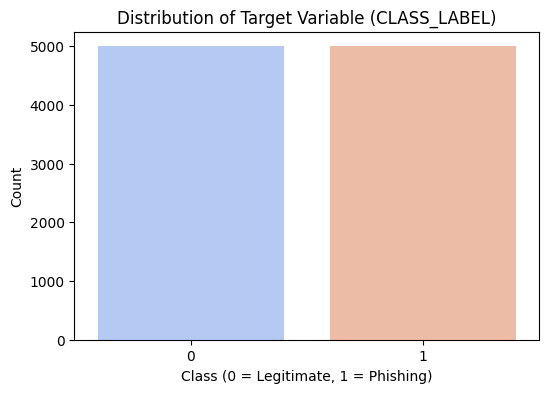

,proportion
CLASS_LABEL,
1,0.5
0,0.5


In [11]:
# Target variable distribution (Phishing vs Legitimate)
plt.figure(figsize=(6,4))
sns.countplot(x='CLASS_LABEL', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (CLASS_LABEL)')
plt.xlabel('Class (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

# Check class balance
df['CLASS_LABEL'].value_counts(normalize=True)

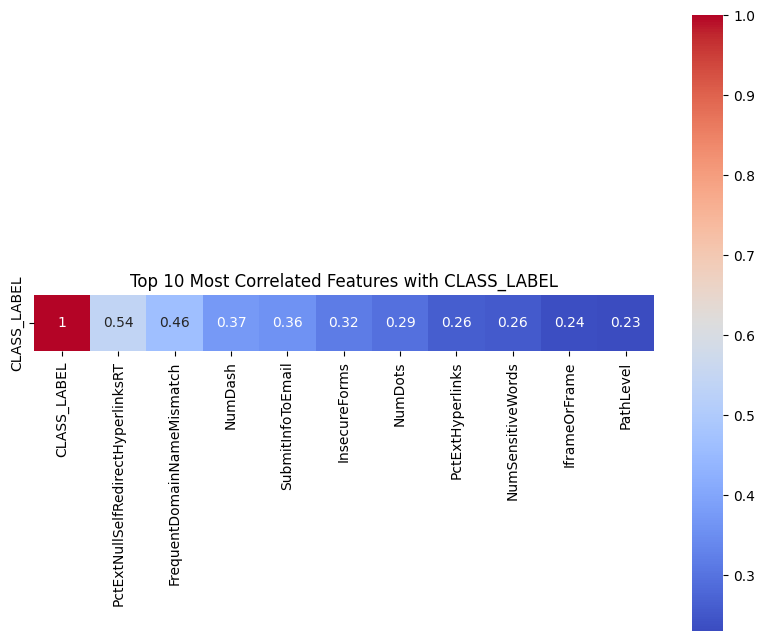

In [8]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# top 10 most correlated features with the target variable
top_corr_features = corr_matrix['CLASS_LABEL'].abs().sort_values(ascending=False).head(11)

# a heatmap of the top 10 most correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_features.to_frame().T, annot=True, cmap='coolwarm', square=True)
plt.title("Top 10 Most Correlated Features with CLASS_LABEL")
plt.show()

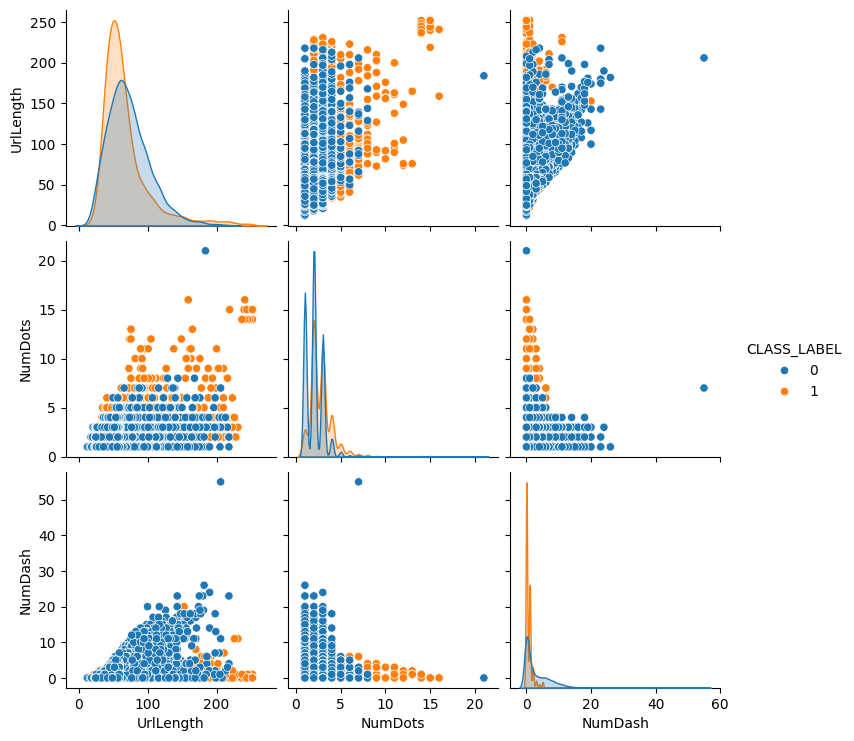

In [ ]:
# Create a pairplot using Seaborn
sns.pairplot(df, vars=['UrlLength', 'NumDots', 'NumDash'], hue='CLASS_LABEL')
plt.show()

### Feature Engineering and Data Preparation

In [34]:
# Split the data into features and target
X = df.drop(['CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']

In [35]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Model Building and Evaluation

### *1. Logistic Regression*

Logistic Regression Results:
Accuracy: 0.9433333333333334
Precision: 0.94469746258946
Recall: 0.94469746258946
F1 Score: 0.94469746258946


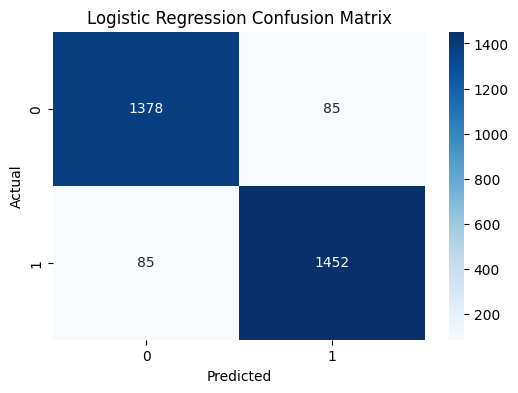

In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### *2. Decision Tree*

Decision Tree Results:
Accuracy: 0.9593333333333334
Precision: 0.954983922829582
Recall: 0.9661678594664932
F1 Score: 0.9605433376455369


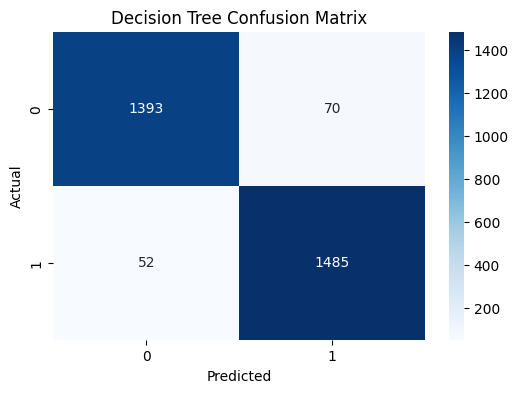

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### *3. Random Forest*


Random Forest Results:
Accuracy: 0.9796666666666667
Precision: 0.9792207792207792
Recall: 0.9811320754716981
F1 Score: 0.9801754956126096


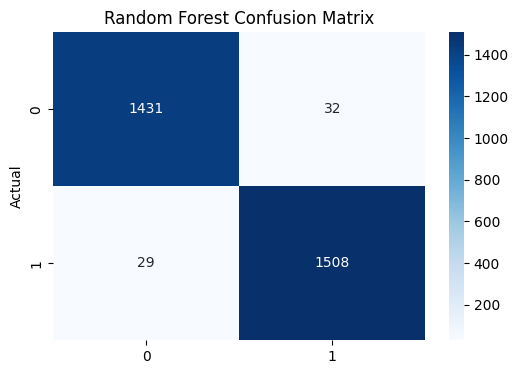

In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.show()

### *4. Support Vector Machine*


SVM Results:
Accuracy: 0.9633333333333334
Precision: 0.9618122977346278
Recall: 0.966818477553676
F1 Score: 0.9643088903309539


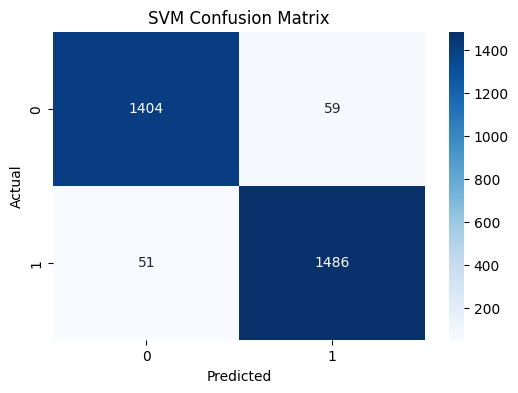

In [43]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### *5. Gradient Boosting*


Gradient Boosting Results:
Accuracy: 0.9753333333333334
Precision: 0.9746917585983128
Recall: 0.9772283669486012
F1 Score: 0.9759584145549057


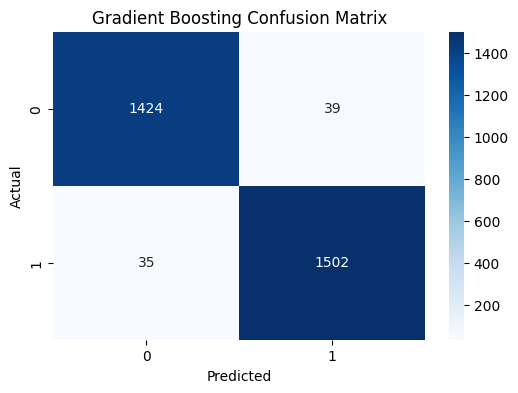

In [44]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
# Create a comparison dataframe

results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'SVM'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_svm)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_svm)
    ]
})



# Display results
print("\nModel Comparison:")
# Set 'Model' as index and sort it alphabetically
results = results.sort_values(by=['Model', 'Accuracy']).reset_index(drop=True)
display(results)


Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.959333,0.954984,0.966168,0.960543
1,Gradient Boosting,0.975333,0.974692,0.977228,0.975958
2,Logistic Regression,0.943333,0.944697,0.944697,0.944697
3,Random Forest,0.979667,0.979221,0.981132,0.980175
4,SVM,0.963333,0.961812,0.966818,0.964309


In [81]:
# Let's visualize the above
import plotly.express as px


results_melted = results.melt(id_vars='Model',
                              value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                              var_name='Metric',
                              value_name='Score')

# Create interactive grouped bar chart
fig = px.bar(results_melted,
             x='Model',
             y='Score',
             color='Metric',
             barmode='group',
             title='Model Performance Comparison',
             labels={'Score': 'Performance Score'},
             color_discrete_sequence=px.colors.qualitative.Set2)

# Adjust layout
fig.update_layout(
    yaxis=dict(range=[0.9, 1.0]),
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

### Feature Importance Analysis

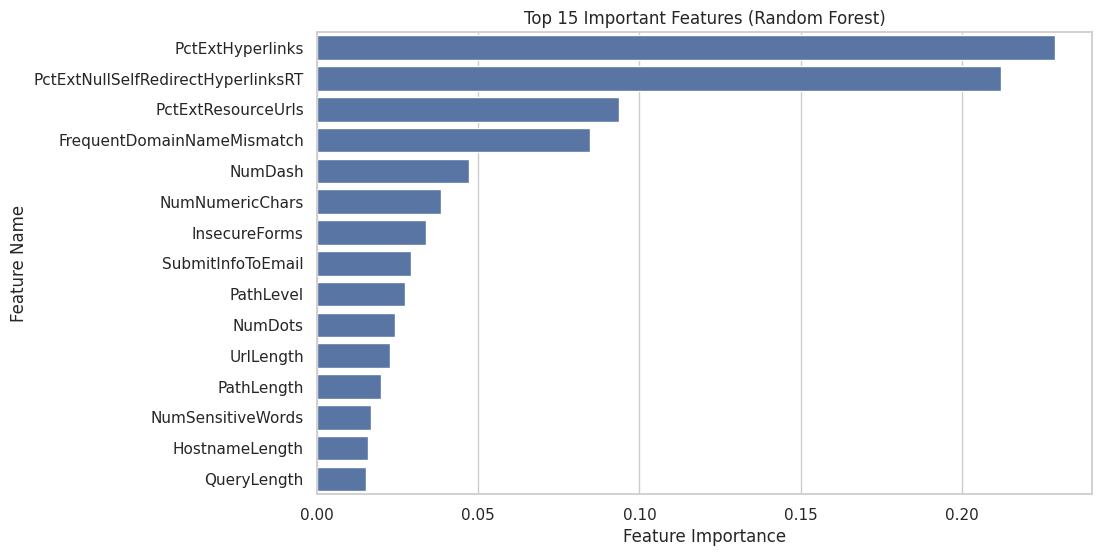

In [82]:
# Get feature importances from Random Forest
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                  index=X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(15)['importance'],
            y=feature_importances.head(15).index)
plt.title('Top 15 Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

### Hyperparameter Tuning (Random Forest)

In [84]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("\nOptimized Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9772857142857143

Optimized Random Forest Results:
Accuracy: 0.979
Precision: 0.9779507133592736
Recall: 0.9811320754716981
F1 Score: 0.9795388113023709


In [80]:
# Make predictions on the test set
predictions = {
    'Logistic Regression': lr_model.predict(X_test),
    'Decision Tree': dt_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'SVM': svm_model.predict(X_test),
    'Gradient Boosting': gb_model.predict(X_test),
}

# Print the predictions
for model, pred in predictions.items():
    print(f"Predictions for {model}: {pred}")

Predictions for Logistic Regression: [0 1 1 ... 0 0 1]
Predictions for Decision Tree: [0 1 1 ... 1 0 1]
Predictions for Random Forest: [0 1 1 ... 0 0 1]
Predictions for SVM: [0 1 1 ... 0 0 1]
Predictions for Gradient Boosting: [0 1 1 ... 0 0 1]


### Final Model Selection and Deployment

In [ ]:
# To test Linear Separability and Multicollinearity
# I'll use Linear SVM and Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

# Print VIF values
print(vif)

# Train a linear SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

# Predict and evaluate
y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Linear SVM accuracy: {accuracy:.3f}")

            VIF                            features
0     10.793825                             NumDots
1      4.088173                      SubdomainLevel
2      9.375391                           PathLevel
3   8390.017420                           UrlLength
4      4.114042                             NumDash
5      1.572269                       NumUnderscore
6      8.433048                  NumQueryComponents
7      7.010619                        NumAmpersand
8      3.671920                             NumHash
9      3.173787                     NumNumericChars
10    69.346885                             NoHttps
11     2.835799                        RandomString
12     1.459148                           IpAddress
13     1.878062                  DomainInSubdomains
14     2.202517                       DomainInPaths
15          NaN                     HttpsInHostname
16   655.933662                      HostnameLength
17  2597.955565                          PathLength
18   943.410

In [85]:
# Based on our analysis, Random Forest performs best
final_model = RandomForestClassifier(n_estimators=200,
                                   max_depth=20,
                                   min_samples_split=2,
                                   random_state=42)
final_model.fit(X_train, y_train)

# Save the model for deployment
import joblib
joblib.dump(final_model, 'phishing_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nFinal model saved successfully!")


Final model saved successfully!
